### Random Walk Generation
Recall that the stochastic model for asset returns is given by the Geometric Brownian Motion process:
$$ \frac{S_{t+dt}-S_t}{S_t}=\mu dt +\sigma \sqrt{dt} \xi_t $$

When we generate simulated returns, we can usually ignore the decompositino of $ \mu $, since we only care about the net effective drift term without worrying about what the components of it are.

The implementation is very close to the equation above, although it can be optimized in many ways, this is the most direct translation of the equation.
``` Python
import numpy as np

def gbm(
    n_years = 10,
    n_scenarios = 1000,
    mu = 0.07,
    sigma = 0.15,
    steps_per_year = 12,
    s_0 = 100.0
):
    """
    Evolution of Geometric Brownian Motion trajectories, such as for Stock Prices
    :param n_years: The number of years to generate data for
    :param n_paths: The number of scenarios/trajectories
    :param mu: Annualized Drift, e.g., Market Return
    :param sigma: Annualized Volatility
    :param steps_per_year: grranularity of the simulation
    :param s_0: initial value
    :return: a numpy array of n_paths columns and n_years * steps_per_year_rows.
    """
    # Derive per-step model parameters from user specifications
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size = (n_steps, n_scenarios))

    # start with just the returns, biased by mu_dt plus 1 since we wil need that later.
    rets = mu * dt + sigma * np.sqrt(dt) * xi
    prices = s_0 * (1 + rets).cumprod()

    return prices
```

In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
def gbm0(
    n_years = 10,
    n_scenarios = 1000,
    mu = 0.07,
    sigma = 0.15,
    steps_per_year = 12,
    s_0 = 100.0
):
    """
    Evolution of Geometric Brownian Motion trajectories, such as for Stock Prices
    :param n_years: The number of years to generate data for
    :param n_paths: The number of scenarios/trajectories
    :param mu: Annualized Drift, e.g., Market Return
    :param sigma: Annualized Volatility
    :param steps_per_year: grranularity of the simulation
    :param s_0: initial value
    :return: a numpy array of n_paths columns and n_years * steps_per_year_rows.
    """
    # Derive per-step model parameters from user specifications
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size = (n_steps, n_scenarios))

    # start with just the returns, biased by mu_dt plus 1 since we wil need that later.
    rets = mu * dt + sigma * np.sqrt(dt) * xi
    # convert to a DataFrame
    rets = pd.DataFrame(rets)
    # covert to prices
    prices = s_0 * (1 + rets).cumprod()

    return prices

In [ ]:
def gbm1(
    n_years = 10,   
    n_scenarios = 1000,
    mu = 0.07, # 7% as default
    sigma = 0.15, # 15% volatility
    steps_per_year = 12,
    s_0 = 100.0,
) -> pd.DataFrame:
    """
    Evolution of Geometric Brownian Motion trajectories, such as Stock Prices
    
    :param n_years: The number of years to generate data for
    :param n_scenario: the number of scenarios/trajectories
    :param mu: Annualized Drift, e.g., Market Return
    :param sigma: Annualized Volatility
    :param steps_per_year: granularity of the simualation
    :param s_0: inital value

    :return: a numpy array of n_paths columns and (n_years * steps_per_year) rows -> return as DataFrame
    """
    # Derive per-step Model Parameters from User Specification
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plust_1 = np.random.normal(
        loc = (mu * dt * 1), # mean value, center
        scale = (sigma * np.sqrt(dt)), # Standard Deviation
        size = (n_steps, n_scenarios), # Output Shape
    ) # return value is n_darray or scalar -> drawn samples
    prices = s_0 * pd.DataFrame(rets_plust_1).cumprod()

    return prices

In [ ]:
def gbm(
    n_years: int = 10,
    n_scenarios: int = 1000,
    mu: float = 0.07,
    sigma: float = 0.15,
    steps_per_year: int = 12,
    s_0: float = 100.0,
) -> pd.DataFrame:
    """
    Compute the Geometric Brownian Motion trajectories, such as Stock Prices
    
    :param n_years: int
        The number of years to generate data for 
    :param n_scenarios: int
        The number of scenarios/trajectories
    :param mu: float
        Annualized Drift, e.g., Market Return
    :param sigma: float
        Annualized Volatility
    :param steps_per_year: int
        granularity of the simulation
    :param s_0: float
        The intial value

    :return: pd.DataFrame
        a numpy array of (n_paths) columns and (n_years * steps_per_year) rows -> return as DataFrame.
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year) + 1
    rets_plus_1 = np.random.normal(
        loc = (mu * dt + 1),  # the mean value, the centre
        scale = (sigma * np.sqrt(dt)), # standard deviation
        size = (n_steps, n_scenarios), # output size
    )
    rets_plus_1[0] = 1
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

<Axes: >

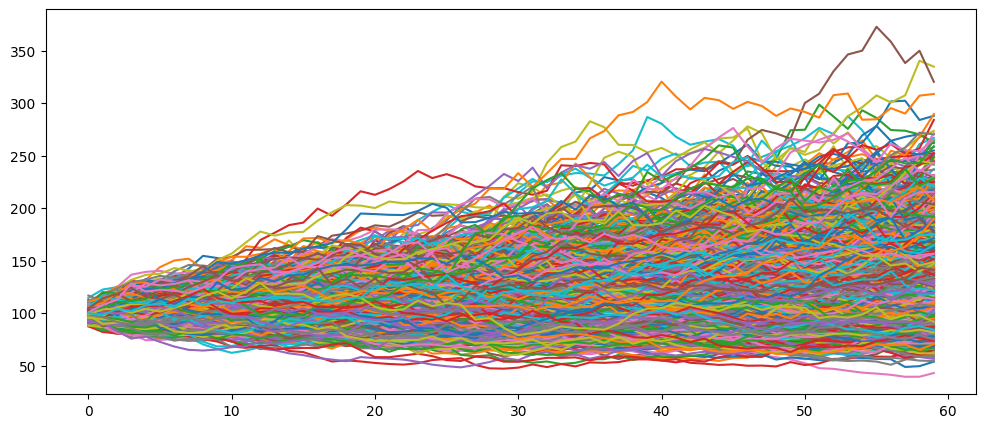

In [11]:
gbm0(n_years = 5, n_scenarios=1000, mu= 0.07).plot(figsize = (12, 5), legend = False)

##### Why are the terminals prices slightly, but consistently biased upwards?

Based on the definition, we need to use the following equation for the computation of the expected return:
$$ (1 + \mu_{Ann})^{dt} $$
to compute the Monthly Expected Return using the given Annualized Expected Return.

However, we can clearly see that $ (\mu_{Ann} \cdot dt) + 1 $ is used to compute the new expected return. Why are we using this, and why does it have the upward bias?

According to the Taylor Series Expansion, we can make a use of linear estimation when the value of `dt` is close to 0 as follow:
$$ (1 + x)^n = 1 + nx + higher\_order\_terms $$
If the value of `n` is really small, then the value of higher_order_term is negligible. While still we do have the remaining value to get the extra values. Therefore, we do have the upward tendency.

Then, despite of the error, why are we using the linear estimation over exponential form? That is because of computation power. Linear estimation have the time complexity of $ O(1) $ while the exponential form has $ O(log(dt)) $.